In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
import glob
import cv2

In [6]:
train_files=glob.glob("C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train/*/**")

In [7]:
len(train_files)

10000

In [8]:
train_files

['C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\10.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\100.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\1004.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\1005.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\1006.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\1007.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\1008.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\1011.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask

In [9]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\Augmented_453_316987.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithoutMask\\2191.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithoutMask\\4523.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithoutMask\\5022.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\Augmented_610_7303457.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask\\Augmented_265_2980693.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithoutMask\\956.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/train\\WithMask

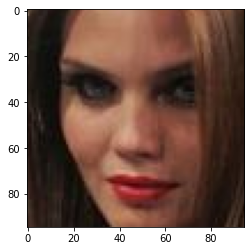

In [14]:
from PIL import Image
img=Image.open(train_files[20])
plt.imshow(img)

In [15]:
np.array(img).shape

(95, 95, 3)

In [18]:
grey_scale=[]
resized_files=[]
i=0;

In [19]:
for items in train_files:
    img=Image.open(items).convert('L')
    img.save('greyscale.jpeg')
    grey_scale.append(img)
    img=grey_scale[i].resize((128,128))
    resized_files.append(img)
    i=i+1

In [27]:
np.array(resized_files[1000]).shape

(128, 128)

In [28]:
rgb_files=[]

In [29]:
for i,fi in enumerate(resized_files):
    img= cv2.cvtColor(np.array(fi),cv2.COLOR_GRAY2RGB)
    rgb_files.append(img)

In [30]:
len(rgb_files)

10000

In [31]:
rgb_files[0].shape

(128, 128, 3)

In [33]:
np.array(rgb_files[1]).shape

(128, 128, 3)

In [34]:
X_train=np.zeros((len(rgb_files),128,128,3))
Y_train=np.zeros((len(train_files),1))
for i,fi in enumerate(rgb_files):
    #fi_array=np.array(fi)
    if(fi.shape[0]==128 and fi.shape[1]==128):
        X_train[i,:,:,:]=fi
        
for i, fis in enumerate(train_files):
    if "WithoutMask" in fis:
        Y_train[i]=  0
    elif "WithMask" in fis:
        Y_train[i]= 1

In [35]:
X_train

array([[[[150., 150., 150.],
         [151., 151., 151.],
         [144., 144., 144.],
         ...,
         [103., 103., 103.],
         [ 94.,  94.,  94.],
         [ 94.,  94.,  94.]],

        [[144., 144., 144.],
         [137., 137., 137.],
         [143., 143., 143.],
         ...,
         [ 99.,  99.,  99.],
         [ 94.,  94.,  94.],
         [ 94.,  94.,  94.]],

        [[136., 136., 136.],
         [154., 154., 154.],
         [151., 151., 151.],
         ...,
         [ 97.,  97.,  97.],
         [ 94.,  94.,  94.],
         [ 93.,  93.,  93.]],

        ...,

        [[ 90.,  90.,  90.],
         [ 94.,  94.,  94.],
         [ 98.,  98.,  98.],
         ...,
         [ 60.,  60.,  60.],
         [ 60.,  60.,  60.],
         [ 60.,  60.,  60.]],

        [[ 92.,  92.,  92.],
         [ 94.,  94.,  94.],
         [ 99.,  99.,  99.],
         ...,
         [ 56.,  56.,  56.],
         [ 56.,  56.,  56.],
         [ 57.,  57.,  57.]],

        [[ 94.,  94.,  94.],
       

In [36]:
Y_train

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [37]:
X_train/255.0

array([[[[0.58823529, 0.58823529, 0.58823529],
         [0.59215686, 0.59215686, 0.59215686],
         [0.56470588, 0.56470588, 0.56470588],
         ...,
         [0.40392157, 0.40392157, 0.40392157],
         [0.36862745, 0.36862745, 0.36862745],
         [0.36862745, 0.36862745, 0.36862745]],

        [[0.56470588, 0.56470588, 0.56470588],
         [0.5372549 , 0.5372549 , 0.5372549 ],
         [0.56078431, 0.56078431, 0.56078431],
         ...,
         [0.38823529, 0.38823529, 0.38823529],
         [0.36862745, 0.36862745, 0.36862745],
         [0.36862745, 0.36862745, 0.36862745]],

        [[0.53333333, 0.53333333, 0.53333333],
         [0.60392157, 0.60392157, 0.60392157],
         [0.59215686, 0.59215686, 0.59215686],
         ...,
         [0.38039216, 0.38039216, 0.38039216],
         [0.36862745, 0.36862745, 0.36862745],
         [0.36470588, 0.36470588, 0.36470588]],

        ...,

        [[0.35294118, 0.35294118, 0.35294118],
         [0.36862745, 0.36862745, 0.36862745]

In [68]:
model=Sequential()
model_part1=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

In [69]:
for layer in model_part1.layers:
    layer.trainable=False

In [70]:
model.add(model_part1)

In [71]:
from keras.layers import Flatten,Dense
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [73]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [75]:
model.fit(X_train, Y_train,epochs=3,validation_split=0.1)

Epoch 1/3
282/282 [==============================] - 297s 1s/step - loss: 0.1076 - accuracy: 0.9870 - val_loss: 0.0710 - val_accuracy: 0.9940
Epoch 2/3
282/282 [==============================] - 298s 1s/step - loss: 0.0267 - accuracy: 0.9969 - val_loss: 0.0376 - val_accuracy: 0.9940
Epoch 3/3
282/282 [==============================] - 295s 1s/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.0253 - val_accuracy: 0.9930


In [76]:
test_files=glob.glob("C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test/*/**")

In [77]:
len(test_files)

992

In [91]:
from random import shuffle
shuffle(test_files)
test_files

['C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithoutMask\\5919.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithMask\\Augmented_297_2673384.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithoutMask\\3165.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithMask\\Augmented_638_473985.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithoutMask\\5515.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithMask\\385.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithoutMask\\1163.png',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/mask,without mask dataset/Face Mask Dataset/test\\WithMask\\Augmented_28_4225269.pn

In [92]:
grey_scale_test=[]
resized_files_test=[]
i=0;

In [93]:
for items in test_files:
    img=Image.open(items).convert('L')
    img.save('greyscale.jpeg')
    grey_scale_test.append(img)
    img=grey_scale_test[i].resize((128,128))
    resized_files_test.append(img)
    i=i+1

In [94]:
rgb_files_test=[]

In [95]:
for i,fi in enumerate(resized_files_test):
    img= cv2.cvtColor(np.array(fi),cv2.COLOR_GRAY2RGB)
    rgb_files_test.append(img)

In [96]:
len(rgb_files_test)

992

In [97]:
np.array(rgb_files_test[0]).shape

(128, 128, 3)

In [98]:
X_test=np.zeros((len(rgb_files_test),128,128,3))
Y_test=np.zeros((len(test_files),1))
for i,fi in enumerate(rgb_files_test):
    #fi_array=np.array(fi)
    if(fi.shape[0]==128 and fi.shape[1]==128):
        X_test[i,:,:,:]=fi
        
for i, fis in enumerate(test_files):
    if "WithoutMask" in fis:
        Y_test[i]=  0
    elif "WithMask" in fis:
        Y_test[i]= 1

In [99]:
X_test

array([[[[ 11.,  11.,  11.],
         [ 17.,  17.,  17.],
         [ 17.,  17.,  17.],
         ...,
         [ 47.,  47.,  47.],
         [ 46.,  46.,  46.],
         [ 28.,  28.,  28.]],

        [[ 11.,  11.,  11.],
         [ 15.,  15.,  15.],
         [ 15.,  15.,  15.],
         ...,
         [ 41.,  41.,  41.],
         [ 44.,  44.,  44.],
         [ 37.,  37.,  37.]],

        [[ 14.,  14.,  14.],
         [ 17.,  17.,  17.],
         [ 17.,  17.,  17.],
         ...,
         [ 32.,  32.,  32.],
         [ 37.,  37.,  37.],
         [ 47.,  47.,  47.]],

        ...,

        [[  9.,   9.,   9.],
         [  8.,   8.,   8.],
         [  7.,   7.,   7.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.]],

        [[  9.,   9.,   9.],
         [  8.,   8.,   8.],
         [  7.,   7.,   7.],
         ...,
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.]],

        [[  8.,   8.,   8.],
       

In [100]:
X_test/255.0

array([[[[0.04313725, 0.04313725, 0.04313725],
         [0.06666667, 0.06666667, 0.06666667],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.18431373, 0.18431373, 0.18431373],
         [0.18039216, 0.18039216, 0.18039216],
         [0.10980392, 0.10980392, 0.10980392]],

        [[0.04313725, 0.04313725, 0.04313725],
         [0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         ...,
         [0.16078431, 0.16078431, 0.16078431],
         [0.17254902, 0.17254902, 0.17254902],
         [0.14509804, 0.14509804, 0.14509804]],

        [[0.05490196, 0.05490196, 0.05490196],
         [0.06666667, 0.06666667, 0.06666667],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.14509804, 0.14509804, 0.14509804],
         [0.18431373, 0.18431373, 0.18431373]],

        ...,

        [[0.03529412, 0.03529412, 0.03529412],
         [0.03137255, 0.03137255, 0.03137255]

In [101]:
Y_test

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [102]:
model.predict(X_test)

31/31 [==============================] - 28s 822ms/step


array([[1.0000000e+00, 2.6189164e-23],
       [1.6101478e-30, 1.0000000e+00],
       [1.0000000e+00, 6.6289063e-18],
       ...,
       [1.0000000e+00, 1.1303574e-26],
       [2.9663113e-21, 1.0000000e+00],
       [1.1309978e-30, 1.0000000e+00]], dtype=float32)

In [ ]:
model.evaluate(X_test, Y_test, batch_size=128)

6/8 [=====================>........] - ETA: 7s - loss: 0.0973 - accuracy: 0.9922 